# Titanic 실습

@ sheon-j

---

**Contents**
1. Overview
2. Dataset
3. EDA
4. Working with Feature Data

## 1. Overview
---
판다스 스터디의 두 번째 주제입니다. Titanic Dataset을 통해 가벼운 EDA와 ML을 실습합니다.

타이타닉은 영국의 북대서양 횡단 여객선입니다. 1912년 4월 10일 영국의 사우샘프턴에서 미국의 뉴욕으로 향하던 첫 항해 중, 4월 14일 **23시 40분** 빙산과 충돌하여 주갑판이 함몰되고 우현에 구멍이 났습니다. 타이타닉이 완전히 침몰한 시간은 **2시 20분**입니다. 

출항 당시 승선 인원은 **2,224명**이였으며, 타이타닉의 침몰로 **1,514명**이 사망, **710명**이 생존하였습니다.
타이타닉의 호화로운 시설과 다르게 구명정은 20척 밖에 없었습니다. 구명정 20척의 최대 정원은 1,178명이었습니다. 침몰 당시에도 배에 1,000여명의 사람들이 남아 있었으며 바다로 뛰어든 많은 사람들은 저체온증으로 사망하였습니다. 구명정을 타고 있다 구조된 사람은 707명입니다.

![titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/440px-RMS_Titanic_3.jpg)

### 도메인

| **분류**      | **탑승자** | **생존률** | **사망률** | **생존자** | **사망자** |
| ------------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| 1등실, 어린이 | 6          | 83%        | 17%        | 5          | 1          |
| 2등실, 어린이 | 24         | 100%       | 0%         | 24         | 0          |
| 3등실, 어린이 | 79         | 34%        | 66%        | 27         | 52         |
| 1등실, 여성   | 144        | 97%        | 3%         | 140        | 4          |
| 2등실, 여성   | 93         | 86%        | 14%        | 80         | 13         |
| 3등실, 여성   | 165        | 46%        | 54%        | 76         | 89         |
| 1등실, 남성   | 175        | 33%        | 67%        | 57         | 118        |
| 2등실, 남성   | 168        | 8%         | 92%        | 14         | 154        |
| 3등실, 남성   | 462        | 16%        | 84%        | 75         | 387        |
| 승무원, 여성  | 23         | 87%        | 13%        | 20         | 3          |
| 승무원, 남성  | 885        | 22%        | 78%        | 192        | 693        |
| 어린이 총합   | 109        | 51%        | 49%        | 56         | 53         |
| 여성 총합     | 425        | 74%        | 26%        | 316        | 109        |
| 남성 총합     | 1690       | 20%        | 80%        | 338        | 1352       |
| **전체 총합** | **2224**   | **32%**    | **68%**    | **710**    | **151**    |

* 구명조끼가 넉넉하게 지급되어서 익사자는 그렇게 많지 않았고, 사망 원인의 대다수는 -2℃의 수온으로 인한 저체온증
* 2등실, 3등실 남성 승객의 사망비율이 상대적으로 높았는데 2등실 남성 승객 중 92%가 사망
* 1,309개의 데이터 활용 (승무원 제외)

**승객**
* 가장 높은 사망률의 객실은 3등실
* 구명정에서 가장 떨어짐, 복잡한 구조, 출입이 제한된 곳이 많음
* 이민자 등의 외국인이 많아 언어적인 이슈

**선원**
* 가장 생존률이 높은 부서는 갑판부
* 사망자가 제일 많은 부서는 기관부
* 생존률이 가장 낮은 부서는 파견직 선원

**탈출**
* 침몰 속도가 점점 빨라졌는데, 좌현 앞쪽으로 기울어짐
* 대피 훈련 미흡, 혼란스러운 상황
* 구조정에 아이들과 여자를 먼저 태우는 사회 분위기
  * 여자와 아이들을 **먼저** 태울 것
  * 여자와 아이들**만** 태울 것
  * 혼란을 막기 위해 관습을 철저히 실시
* 3등실의 복잡한 선내 구조, 이미 구명정은 떠난 상태
* 구명정의 정원이 탑승객의 절반
  * 인원 수가 아닌 톤 수에 비례한 구명정 수
* 구명정에 최대 수용을 하지 않은 채 출발
  * 당시 구명보트의 인식은 탑승자를 다른 배에 태운 뒤 돌아와서 다시 구조하는 식의 인식

### 가설

생존은 구명정 탑승 여부가 가장 중요함
1. 3등실은 복잡한 구조로 생존률이 낮아짐 >> 타이타닉호의 구조적 특징을 살린 컬럼
2. 여자와 아이들을 먼저 태울 것 >> 남자의 경우 범주화된 나이 컬럼 필요

## 2. Dataset
---
**Feature Column**
* **Age**: 나이 
* **Cabin**: 객실 번호
* **Embarked**: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)
* **Fare**: 티켓 요금
* **Name**: 이름
* **Parch**: 동승한한 부모 및 자식의 수
* **PassengerID**: 탑승객 ID
* **Pclass**: 티켓 클래스 (1: 1등석. 2: 2등석, 3: 3등석)
* **Sex**: 성별
* **SibSp**: 동승한 형제자매 및 배우자의 수
* **Survived**: 생존 여부 (0:사망, 1:생존)
* **Ticket** 티켓 번호

### Imports

In [1]:
# 데이터 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 기본 라이브러리
import re
from collections import Counter

In [2]:
url = 'https://raw.githubusercontent.com/sheon-j/pandas-study/main/datasets/titanic/titanic3.csv'

# boat, body, home.dest는 타겟 이벤트(Survived) 이후의 특성입니다.  
df = pd.read_csv(url).iloc[:, :-3]
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S


### Analyze by Describing Data

In [3]:
df.tail(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S


---
feature 유형

* **범주형**: Name, Sex, Cabin, Embarked

* **순서형**: Survived, Pclass, PassengerId, Ticket

* **연속형**: Age, SibSp, Parch, Fare

In [4]:
# 컬럼명 확인
print(df.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked']


In [5]:
# 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [6]:
# 결측치 확인
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

---
Age와 Cabin에 데이터 전처리가 필요함.
* **나이 (Age)** 컬럼은 1309개의 데이터 중 263개의 결측치가 있음. (20%)
* **객실 번호 (Cabin)** 컬럼은 1014개의 결측치가 있음. (77%)
* **탑승 항구 (Embarked)** 컬럼은 2개의 결측치가 있음.

In [7]:
# 통계치 확인: Numeric(int, float type)
df.describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00
survived,1309.0,0.38,0.49,0.00,0.0,0.00,1.00,1.00
age,1046.0,29.88,14.41,0.17,21.0,28.00,39.00,80.00
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00
parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00
fare,1308.0,33.30,51.76,0.00,7.9,14.45,31.28,512.33


In [8]:
# 통계치 확인: Categorical(object type)
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## 3. EDA
---

### 생존 여부

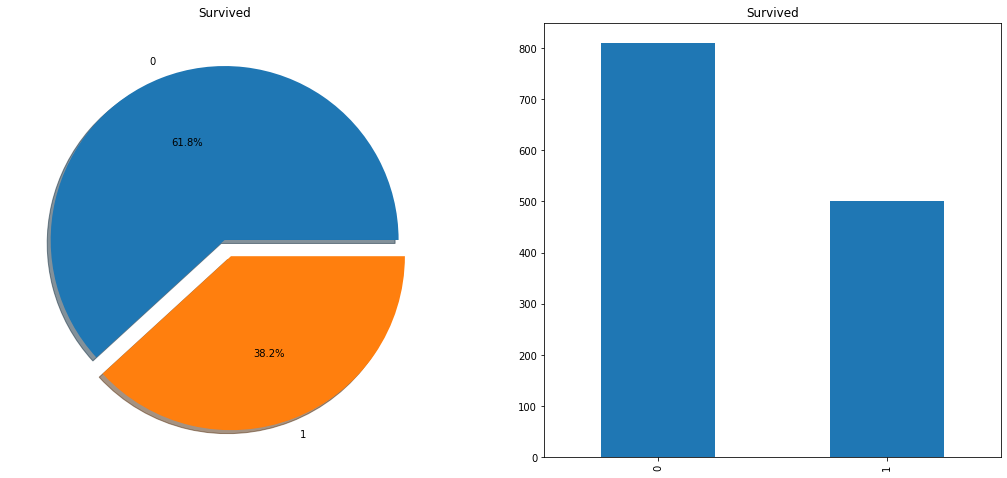

In [9]:
# 생존 여부 시각화
f,ax=plt.subplots(1,2,figsize=(18,8))
df['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

df['survived'].value_counts().plot(kind='bar');
ax[1].set_title('Survived')
plt.show()

### 성별별 생존 여부

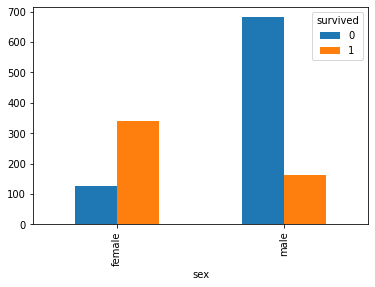

In [10]:
# 성별별 생존률 (관습적 요인)
pd.crosstab(df['sex'], df['survived']).plot.bar();

### 등급별 생존 여부

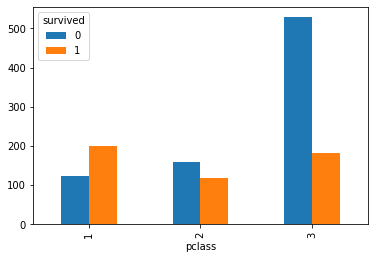

In [11]:
# 등급별 생존률 (관습적 + 구조적 요인)
df.groupby(['pclass', 'survived'])['survived'].count().unstack().plot.bar();

In [12]:
# 성별-등급별 생존률
pd.crosstab([df['pclass'], df['sex']], df['survived'], margins=True)

survived         0    1   All
pclass sex                   
1      female    5  139   144
       male    118   61   179
2      female   12   94   106
       male    146   25   171
3      female  110  106   216
       male    418   75   493
All            809  500  1309

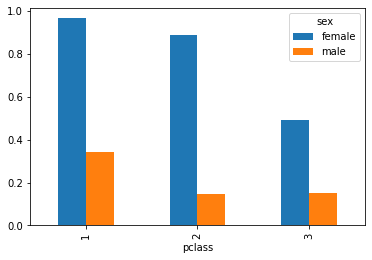

In [13]:
# 성별-등급별 생존률
df.groupby(['pclass', 'sex'])['survived'].mean().unstack().plot.bar();

### 연령별 생존 여부

In [14]:
# 연령 통계 (관습적 요인)
df[['age']].describe().apply(lambda x: round(x, 1)).T

,count,mean,std,min,25%,50%,75%,max
age,1046.0,29.9,14.4,0.2,21.0,28.0,39.0,80.0


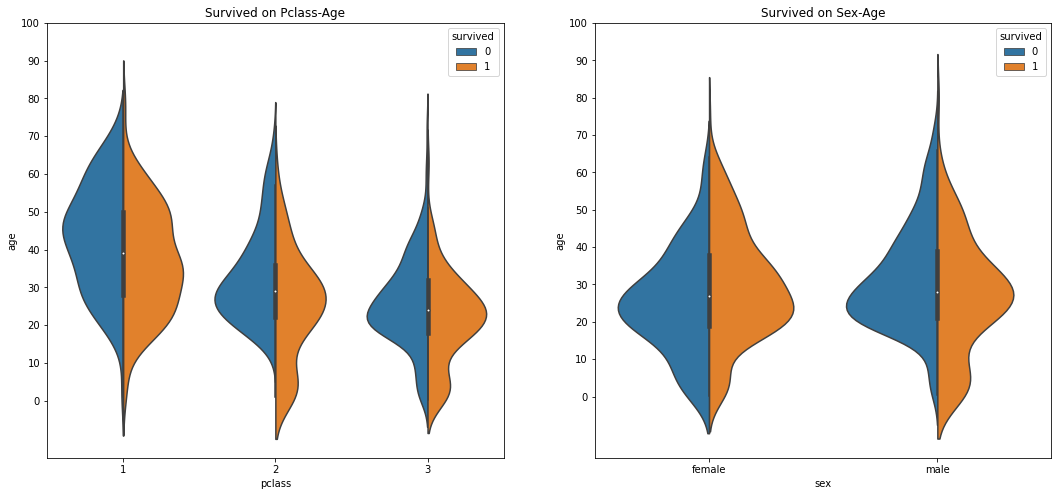

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 탑승객 등급과 나이의 생존 분포
sns.violinplot('pclass', 'age', hue='survived', data=df, split=True, ax=ax[0]);
ax[0].set_title('Survived on Pclass-Age')
ax[0].set_yticks(range(0,110,10));

# 탑승객 성별과 나이의 생존 분포
sns.violinplot('sex','age', hue='survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Survived on Sex-Age')
ax[1].set_yticks(range(0,110,10));
plt.show()

### 티켓 요금별 생존 여부

In [16]:
# 티켓 통계
df[['fare']].describe().apply(lambda x: round(x, 1)).T

,count,mean,std,min,25%,50%,75%,max
fare,1308.0,33.3,51.8,0.0,7.9,14.5,31.3,512.3


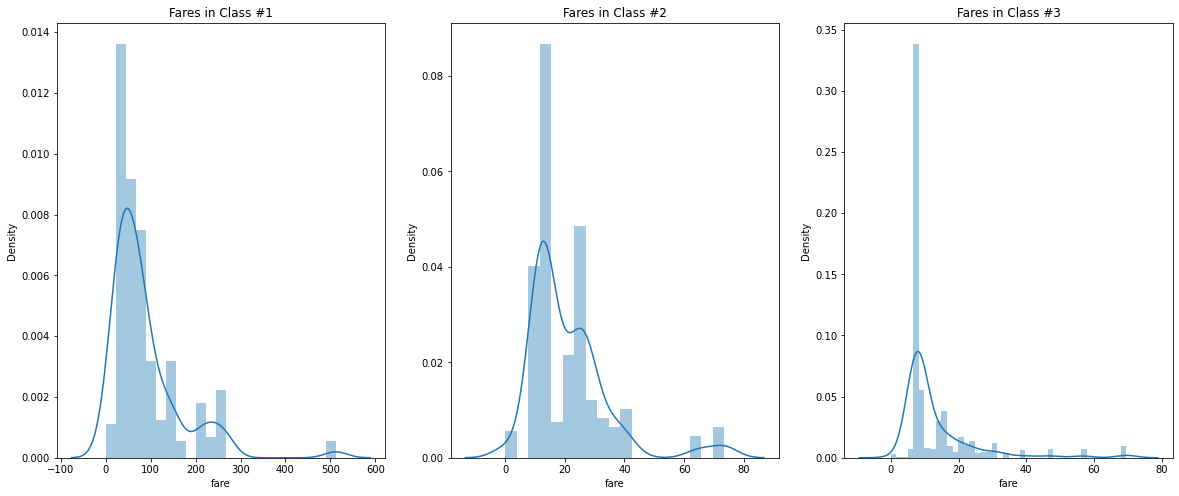

In [17]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['pclass']==1]['fare'],ax=ax[0])
ax[0].set_title('Fares in Class #1')
sns.distplot(df[df['pclass']==2]['fare'],ax=ax[1])
ax[1].set_title('Fares in Class #2')
sns.distplot(df[df['pclass']==3]['fare'],ax=ax[2])
ax[2].set_title('Fares in Class #3')
plt.show()

### 피어슨 상관계수

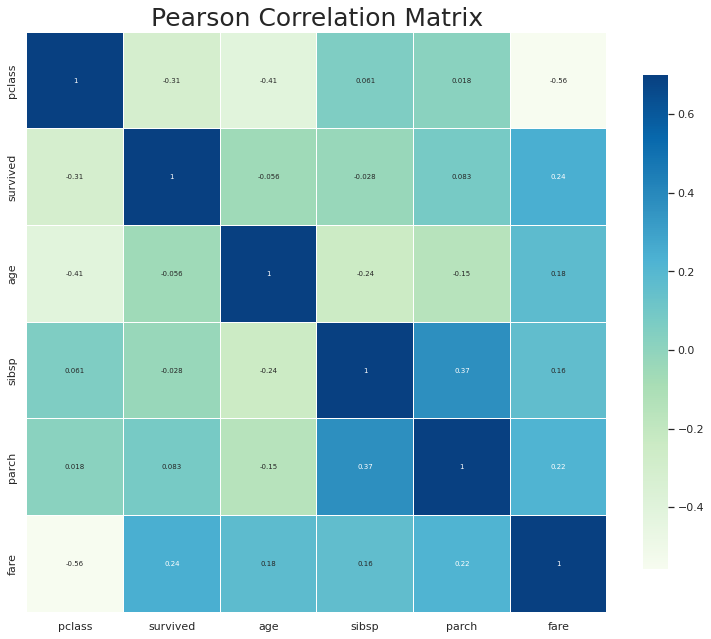

In [18]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7});

## 4. Working with Feature Data

### 가설

생존은 구명정 탑승 여부가 가장 중요함
1. 3등실은 복잡한 구조로 생존률이 낮아짐 >> 타이타닉호의 구조적 특징을 살린 컬럼
  * ex) **C35**
  * 티켓의 정보를 카빈과 연결하여 새 컬럼 생성
  * 카빈의 문자 정보는 데크 컬럼
  * 카빈의 숫자 정보는 우향/좌향 컬럼
2. 여자와 아이들을 먼저 태울 것 >> 남자의 경우 범주화된 나이 컬럼 필요
  * 이름 속 호칭 (Master, Mr, Miss, Mrs)
  * 나이 결측치 채우기

[titanic-map](https://www.encyclopedia-titanica.org/titanic-deckplans/location-t.html)
![cabins](https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png)

![map](https://www.gjenvick.com/Images600/Periodicals/Maritime/TheShipbuilder/1911-Midsummer/94b-PlanOfStateroomsOnCDeck-ForwardOfGrandEntrance-500.jpg)

![img](https://titanicll.files.wordpress.com/2020/07/2020-07-06-1.png)

### 1. 선실 구조의 특징을 살린 컬럼

In [19]:
# Cabin의 데크 범주
  # Cabin 앞 글자만 필터
cabin_deck = df["cabin"].dropna().str.replace(r"[0-9]","").apply(lambda x: x.split(" "))

  # 앞 글자를 리스트화
deck = sum(cabin_deck, [])
print("deck 정보의 수:", len(deck))
print("deck의 종류:", *sorted(list(set(deck))))
print("세부 데크:", *sorted((dict(Counter(deck))).items()))

deck 정보의 수: 356
deck의 종류: A B C D E F G T
세부 데크: ('A', 22) ('B', 96) ('C', 114) ('D', 48) ('E', 45) ('F', 21) ('G', 9) ('T', 1)


In [20]:
df[df["cabin"]=="T"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
30,1,0,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


* **cabin T의 정체는?** 
  * 배 갑판에는 6개의 승객칸이 있음
  * 큰 계단 바로 뒤에 위치
  * T, U, W, X, Y, Z

Pclass의 수: 1309
Deck의 수: 356


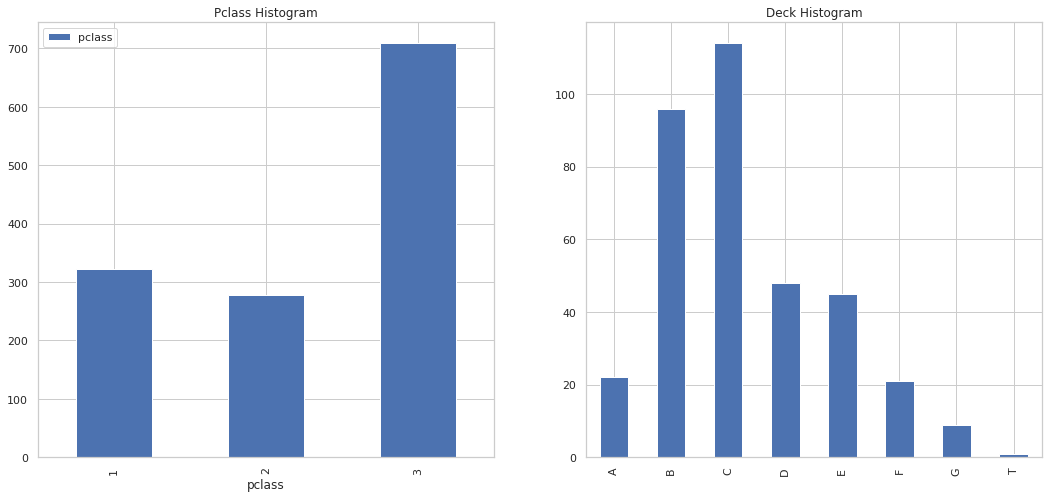

In [21]:
print("Pclass의 수:", len(df["pclass"]))
print("Deck의 수:", len(deck))

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df.groupby("pclass")[["pclass"]].count().plot.bar(ax=ax[0])
ax[0].set_title("Pclass Histogram")
pd.Series(dict(Counter(deck))).sort_index().plot.bar(ax=ax[1])
ax[1].set_title("Deck Histogram");

In [22]:
# PC 17590 vs 17590
ticket_unique = df["ticket"].unique()
ticket_numeric_unique = df["ticket"].apply(lambda x: x.split(" ")[-1]).unique()
print("티켓 원본: ", *ticket_unique[10:15])
print("티켓 숫자: ", *ticket_numeric_unique[10:15])
print("고유 개수 비교(숫자/원본): ", len(ticket_numeric_unique), "/", len(ticket_unique))

df["ticket"] = df["ticket"].apply(lambda x: x.split(" ")[-1])

티켓 원본:  27042 PC 17318 PC 17558 11813 13050
티켓 숫자:  27042 17318 17558 11813 13050
고유 개수 비교(숫자/원본):  924 / 929


In [23]:
# 중복되는 티켓의 수
print(*Counter(df['ticket']).most_common()[:10])

('2343', 11) ('1601', 8) ('2144', 8) ('17608', 7) ('14879', 7) ('347082', 7) ('347077', 7) ('3101295', 7) ('113781', 6) ('19950', 6)


In [24]:
# 같은은 티켓켓 번호지만 cabin이 null인 경우
df[df['ticket']=="17608"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
35,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,17608,262.375,NaN,C
66,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,17608,262.375,B61,C
249,1,1,"Ryerson, Master. John Borie",male,13.0,2,2,17608,262.375,B57 B59 B63 B66,C
250,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,17608,262.375,B57 B59 B63 B66,C
251,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,17608,262.375,B57 B59 B63 B66,C
252,1,0,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,17608,262.375,B57 B59 B63 B66,C
253,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,17608,262.375,B57 B59 B63 B66,C


In [25]:
# deck 컬럼 생성
df["deck"] = df["cabin"].fillna("N").apply(lambda x: x[0]) # Nan은 N 으로 채우기
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,C


In [26]:
n_deck = df[df["deck"]=="N"]["ticket"]
print("전처리 전 deck_null의 개수:", len(n_deck))

for i, no in zip(n_deck.index, n_deck):
  if set(df[df["ticket"]==no]["deck"])-set("N"):
      df.loc[i, "deck"] = list(set(df[df["ticket"]==no]["deck"]))[0]

print("전처리 전 deck_null의 개수:", len(df[df["deck"]=="N"]))

전처리 전 deck_null의 개수: 1014
전처리 전 deck_null의 개수: 1014


In [27]:
# 데크별 합계
print("1등급", *sorted(Counter(df[df["pclass"]==1]["deck"]).items()))
print("2등급", *sorted(Counter(df[df["pclass"]==2]["deck"]).items()))
print("3등급", *sorted(Counter(df[df["pclass"]==3]["deck"]).items()))

1등급 ('A', 22) ('B', 65) ('C', 94) ('D', 40) ('E', 34) ('N', 67) ('T', 1)
2등급 ('D', 6) ('E', 4) ('F', 13) ('N', 254)
3등급 ('E', 3) ('F', 8) ('G', 5) ('N', 693)


In [28]:
# 데크별 생존 여부
pd.crosstab(df["deck"], df["survived"], margins=True).T

deck,A,B,C,D,E,F,G,N,T,All
survived,,,,,,,,,,
0,11,18,37,14,11,8,2,707,1,809
1,11,47,57,32,30,13,3,307,0,500
All,22,65,94,46,41,21,5,1014,1,1309


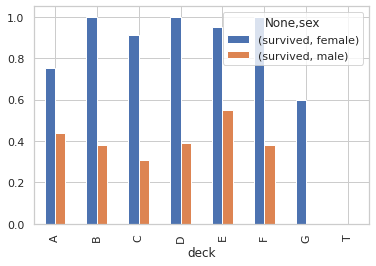

In [29]:
# 데크의 성별별 생존률
df[df["deck"]!="N"].groupby(["deck", "sex"])[["survived"]].mean().apply(lambda x: round(x, 2)).unstack().plot.bar();

**티켓 번호에 객실 정보가 포함되어 있을까?**

출처: https://www.encyclopedia-titanica.org/cabins.html


The allocation of cabins on the Titanic is a source of continuing interest and endless speculation. 

Apart from the recollections of survivors and a few tickets and boarding cards, the only authoritative source of cabin data is the **incomplete first class passenger list recovered with the body of steward Herbert Cave.** The list below includes this data and includes the likely occupants of some other cabins determined by other means.

**The difficulty in determining, with any degree of accuracy, the occupancy of cabins on the Titanic indicates the need for further research in this area.**

Important Note: Highlighted rows and cabin numbers with question marks beside them, represent deductions or speculations or allocations which, as yet, have no identified source. Under no circumstances should these be taken as fact.

In [30]:
# 카빈의 정보가 나타난 승객의 등급은 대부분 1등급이다.
df[df["deck"]!="N"]["pclass"].value_counts()

1    256
2     23
3     16
Name: pclass, dtype: int64

### 2. 범주화된 나이 컬럼

In [31]:
# 이름에 표시된 타이틀
df[["name"]].head(3)

,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"


In [40]:
# title 컬럼 생성
df["title"] = "title"
df["title"] = df["name"].str.extract("(\w+)\.")
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,B,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,C,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,C,Miss


In [41]:
# 타이틀-성별
pd.crosstab(df["title"], df["sex"], margins=True).T

title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
sex,,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,466
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,843
All,1,4,1,1,1,8,1,1,2,61,260,2,1,757,197,2,8,1,1309


In [44]:
# 타이틀별 나이 median
df.groupby("title")[["age"]].median().T

title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
age,70.0,54.5,33.0,40.0,39.0,49.0,38.0,48.0,48.5,4.0,22.0,24.0,24.0,29.0,35.5,28.0,41.5,49.0


In [36]:
df[(df["title"]=="Dr") & (df["sex"]=="female")]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck,title
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,D,Dr


In [65]:
# title 범주 줄이기
df["title"].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df.groupby('title')['age'].median().apply(lambda x: int(x))

title
Dona      39
Master     5
Miss      22
Mr        33
Mrs       36
Other     47
Name: age, dtype: int64

In [47]:
# title 별 생존
pd.crosstab(df["title"],df["survived"], margins=True).T

title,Dona,Master,Miss,Mr,Mrs,Other,All
survived,,,,,,,
0,0,30,85,641,42,11,809
1,1,31,180,129,157,2,500
All,1,61,265,770,199,13,1309


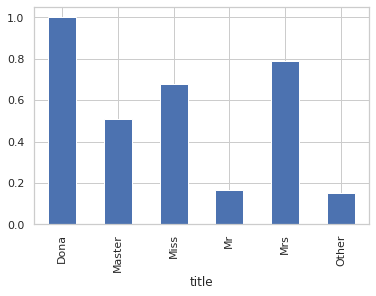

In [64]:
# title 별 생존률
df.groupby("title")["survived"].mean().plot.bar();

In [55]:
# age의 값 채우기
df.loc[(df["age"].isnull())&(df["title"]=='Mr'),'age']=int(df[df["title"]=="Mr"]["age"].median())
df.loc[(df["age"].isnull())&(df["title"]=='Mrs'),'age']=int(df[df["title"]=="Mrs"]["age"].median())
df.loc[(df["age"].isnull())&(df["title"]=='Master'),'age']=int(df[df["title"]=="Master"]["age"].median())
df.loc[(df["age"].isnull())&(df["title"]=='Miss'),'age']=int(df[df["title"]=="Miss"]["age"].median())
df.loc[(df["age"].isnull())&(df["title"]=='Other'),'age']=int(df[df["title"]=="Other"]["age"].median())

In [58]:
# age의 Null 값
df["age"].isna().sum()

0